# 🧪 GraphSDMining: Subgroup Discovery Example
This notebook demonstrates how to load position and social data, bin attributes, construct an interaction graph, mine subgroups, and visualize the top pattern.

In [9]:
import logging
from graphsd import GraphSDMining
from graphsd.datasets import load_data
from graphsd.utils import make_bins
from graphsd.viz import graph_viz

# Enable logging
logging.basicConfig(level=logging.INFO)


## Step 1: Load Dataset

In [10]:
position_df, social_df = load_data("playground_a")
position_df.head(), social_df.head()


(   id      time          x          y
 0   2  2303.372  69.998686  47.570696
 1   2  2304.372  69.984733  47.570696
 2   2  2305.372  70.053981  47.570697
 3   2  2306.373  70.407967  47.995121
 4   2  2307.373  70.650858  47.570705,
    id Gender  AgeM  Emotion  ProSoc  Peer  Conduct  Hyper
 0   1      F   102        0       8     2        0      2
 1   2      F    97        2       9     0        0      1
 2   3      M   106        0       4     0        1      2
 3   4      F    98        1      10     1        1      6
 4   5      F   100        4       9     1        3      2)

## Step 2: Discretize Social Attributes

In [11]:
social_df = make_bins(social_df, n_bins=3, strategy="quantile")
social_df.head()


INFO:graphsd.utils:Skipping column 'Peer' — only 3 unique values (≤ bins: 3)
INFO:graphsd.utils:Completed binning of numeric columns.


,id,Gender,AgeM,Emotion,ProSoc,Peer,Conduct,Hyper
0,1,F,1,0,1,2,0,0
1,2,F,0,1,2,0,0,0
2,3,M,2,0,0,0,0,0
3,4,F,0,0,2,1,0,2
4,5,F,1,1,2,1,1,0


## Step 3: Create and Configure GraphSDMining Model

In [12]:
model = GraphSDMining(random_state=42, n_jobs=1)


## Step 4: Read Data and Construct Graph

In [13]:
model.read_data(position_df, social_df, time_step=10, proximity=1.0)


INFO:graphsd.mining:Reading input data and constructing interaction graph...
INFO:graphsd.utils:Starting interaction count...
INFO:graphsd.utils:Completed interaction counting. 87 unique pairs found.
INFO:graphsd.mining:Created graph with 16 nodes and 87 edges.
INFO:graphsd.mining:Graph construction complete.


## Step 5: Discover Patterns

In [14]:
patterns = model.subgroup_discovery(mode="comparison", min_support=0.2, metric="mean", quality_measure="qP")


INFO:graphsd.mining:Starting subgroup discovery with mode='comparison', min_support=0.2, metric='mean', quality='qP'
INFO:graphsd.mining:Extracted 87 transactions from 87 edges.
INFO:graphsd.mining:Finished subgroup discovery. Returned 43 patterns.


## Step 6: View Pattern Summary

In [15]:
df = model.to_dataframe(patterns)
df.head()


,Pattern,Nodes,In Degree > 0,Out Degree > 0,Edges,Mean Weight,Score
0,"((Emotion, EQ), (Conduct, EQ))",16,16,16,31,11.1,4.8
1,"((Conduct, EQ),)",16,16,16,50,8.5,2.8
2,"((ProSoc, >), (Emotion, EQ), (Conduct, EQ))",14,14,14,21,10.4,2.8
3,"((Conduct, EQ), (Hyper, >))",14,14,14,19,10.4,2.7
4,"((Peer, EQ), (Emotion, EQ))",15,15,15,25,9.8,2.5


## Step 7: Visualize Top Pattern

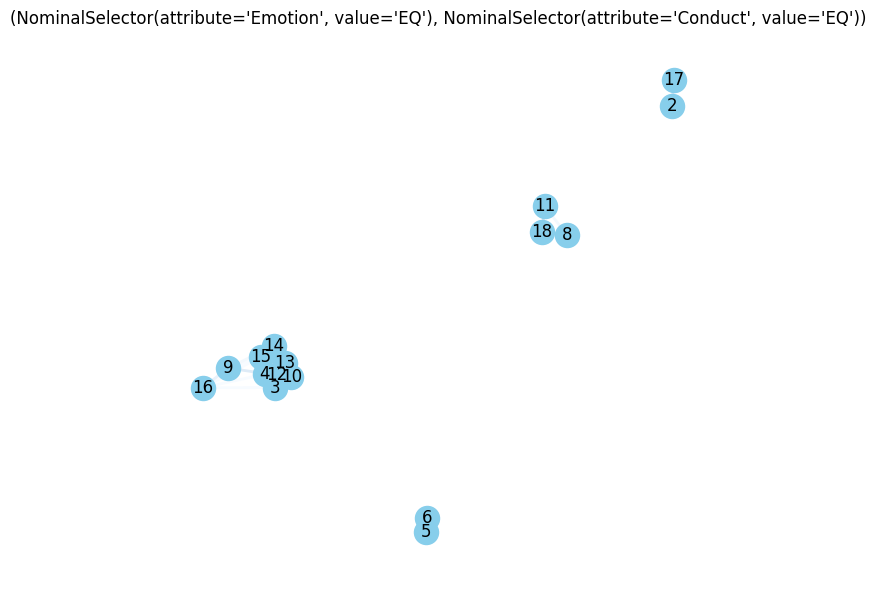

In [16]:
if patterns:
    graph_viz(patterns[0].graph, title=str(patterns[0].name))
